# Introduction to neural network classification with TensorFlow

Here we are going to learn how to write neural networks for classification problems.
A classification problem is a type of problem where you try to classify something as one thing or another
Types of classifications are:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data and view


In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples

n_sample = 1000

# Create circles
X,y = make_circles(n_sample, noise=0.03, random_state=42 )



In [2]:
# Check out features

X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Have a better visualization at our data 

In [4]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


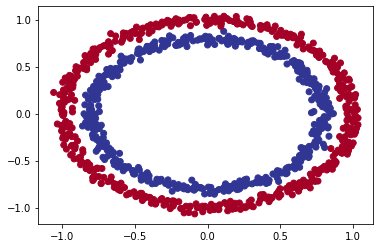

In [5]:
# Visualise it with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [6]:
# check the shapes and features
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# the nr of samples we are working
len(X), len(y)

(1000, 1000)

## Steps in modelling


In [8]:
#import TensorFlow
import tensorflow as tf
tf.__version__

'2.8.2'

In [9]:
tf.random.set_seed(42)

#1. create the model using the Sequential API
model_1  = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
])

#2. compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics =["accuracy"]
                )

#3. fit the model
model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 8ms/step - loss: 0.6942 - accuracy: 0.4830


In [10]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

 Since we are working on a classification problem this accuracy of 50% is like guessing hence we need to improve our model.
 let's try to add another extra layer to our prev model

In [11]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_2 =tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
]    
)

#2. compile th emodel
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

#3. fit the model
model_2.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5010


In [12]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.4980


[0.7018195390701294, 0.49799999594688416]

## Improving our model


In [13]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

Let's see the options we have to improve our model

* 1.  create a model- we might add other input layers and/or increase the nr of h idden input units
* 2. Compiling a model - here we might choose a different method than SGD(), use Adam()
* 3. Fitting a model - we might fit our model for more epochs (i.e. leave it training for longer cycles)

In [14]:
 # set the random seed
 
 tf.random.set_seed(42)

 #1. create a model
 model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(100), #add 100 neurons
     tf.keras.layers.Dense(10), #add another layer with 10 neurons
     tf.keras.layers.Dense(1)
 ])

 # 2. compile the model
 model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
 
 #3. fit the model
 model_3.fit(X, y, epochs=100, verbose=0)

#4. evaluate the model
model_3.evaluate(X,y)



32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


Let's create a function called `plot_decision_boundary()`./config, this fnc will:
* Take in a trained model features(X) and labels(y)
* Create a meshgrid of the different of the X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)




In [16]:
import numpy as np

In [17]:

def plot_decision_boundary(model, X, y):
  """
Plot the decision boundary created by a model prediciting on X
This function is inspired by these two link resources:
1. https://cs231n.github.io/neural-networks-case-study/
2. https://github.com/ranjian0/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_PT_Multilayer_Perceptrons.ipynb
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() -0.1, X[:,1].max() + 0.1
  
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  
  # create X values to make predictions
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # check for multiclass
  if len(y_pred[0]) > 1:
    print ("doing multiclass classification")
    # we have to reshape our predictions to make them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print ("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())






doing binary classification


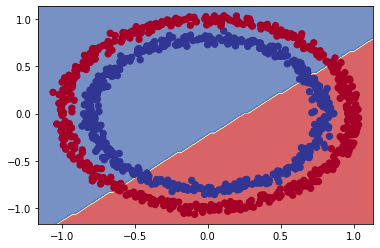

In [18]:
# check out and visualize the predictions our model is doing
plot_decision_boundary(model = model_3,
                       X=X,
                       y=y)

In [19]:
#Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100, 1100, 5) # y=X+100

X_regression, y_regression

# Split our regression data to training and test data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)



Epoch 1/100


ValueError: ignored

We compiled our model for a binary classification problem but now we are trying to run it for a regression problem..no compatibility

In [ ]:
# setup random seed
tf.random.set_seed(42)

# 1. create a model
model_3 = tf.keras.Sequential([
      tf.keras.layers.Dense(1000),
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(1)
])

# 2. compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# plot the model predictions against our regression data
plt.figure(figsize = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Testing data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions data")
plt.legend();

## The missing piece: Non-linearity

In [ ]:
# set the random_seed

tf.random.set_seed(42)

#1. create the model
model_4=tf.keras.Sequential([
        tf.keras.layers.Dense(1, activation=tf.keras.activations.linear) # or just activation="linear"
])

#2. compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, name="test"),
                metrics=["accuracy"]
)

#3. fit the model
history= model_4.fit(X, y, epochs=100)

In [ ]:
# check out the data
plt.scatter(X[:, 0], X[:, 1],c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# check the decision boundary for our latest model
plot_decision_boundary(model=model_4, 
                       X=X,
                       y=y)

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. create a model with a non-linear activation
model_5=tf.keras.Sequential([
       tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

#2. compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

#3. fit the model
history = model_5.fit(X, y, epochs=100)

In [ ]:
# Time to replate the multi-layer neural netw from TensorFlow playground by coding

#set seed
tf.random.set_seed(42)


# 1.create the model
model_6=tf.keras.Sequential([
       tf.keras.layers.Dense(4, activation="relu"),
       tf.keras.layers.Dense(4, activation="relu"),
       tf.keras.layers.Dense(1)
])

# 2.compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. fit the model
model_6.fit(X, y, epochs=100)

In [ ]:
# plot the model
plot_decision_boundary(model_6, X, y)

In [ ]:
#set seed
tf.random.set_seed(42)


# 1.create the model
model_7=tf.keras.Sequential([
       tf.keras.layers.Dense(4, activation="relu"),
       tf.keras.layers.Dense(4, activation="relu"),
       tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2.compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. fit the model
history = model_7.fit(X, y, epochs=100)

In [ ]:
# evaluate our model
model_7.evaluate(X,y)

In [ ]:
# let's visualise our model

plot_decision_boundary(model_7, X, y)

❓**Question** What's wrong with the predictions we've made? Are we
really evaluating our model correctly?
What data did the learn model?
What data did we predict on?

🔑**Note** The combination of linear(straight-lines) and non-linear
(non-straight lines) functions is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines) 
let's see them in actions.

In [21]:
# Create a toy tensor (similar to the data we pass into our models)
A= tf.cast(tf.range(-10,10), tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

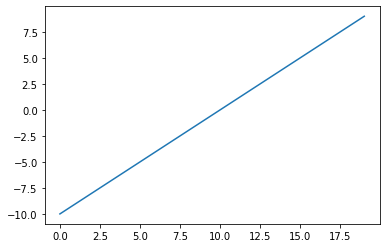

In [22]:
# visualize our toy tensor
plt.plot(A)

In [26]:
# Let's start by replicating sigmoid --> sigmoid = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sigmoid fnc to our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

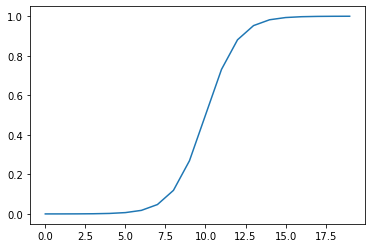

In [27]:
# visualize our fnc
plt.plot(sigmoid(A))

In [30]:
# Let's recreate the relu fnc
def relu(x):
  return tf.maximum(0,x)

# use the relu fnc to our toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

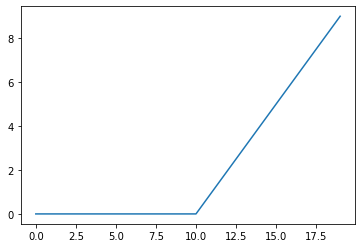

In [31]:
# visualize it
plt.plot(relu(A))

In [32]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

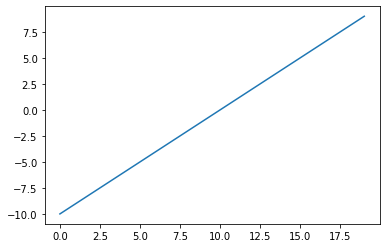

In [35]:
# Let's try the linear activation function
linear = tf.keras.activations.linear(A)

# let's visualize it
plt.plot(linear)

In [36]:
# Does A even change?
A == linear

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and Improving our classification

So far we've been training and testing on the same dataset
However, in ML this is basically a sin.

So, let's create a training and test set.



In [37]:
# Check how many examples we have
len(X)

1000

In [38]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [40]:
# split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [42]:
X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [50]:
# Let's recreate a model to fit on the training model and to evaluate on the testing model

# set random seed
tf.random.set_seed(42)

# 1. create the model
model_8 = tf.keras.Sequential([
       tf.keras.layers.Dense(4, activation="relu"),
       tf.keras.layers.Dense(4, activation="relu"),
       tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

#3. fit the model
history = model_8.fit(X_train, y_train, epochs=25)


Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [51]:
#4. evaluate the model on test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

doing binary classification
doing binary classification


Text(0.5, 1.0, 'Test')

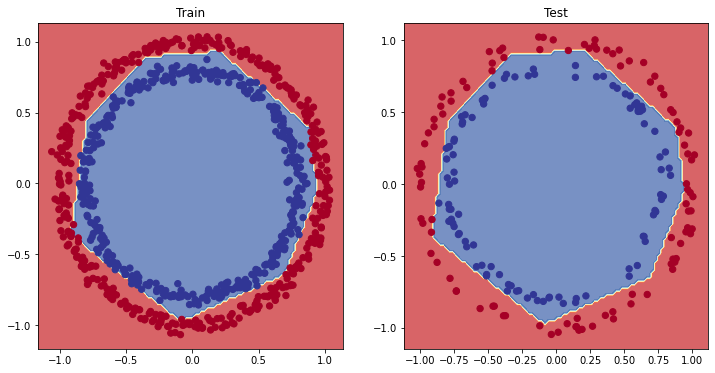

In [52]:
# plot the decision boundaries for training and test sets
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Train")
plot_decision_boundary(model_8, X_test, y_test)
plt.title("Test")

## Plot the loss (or trainings) curves

In [55]:

history.history
# Let's convert the history object into a data frame
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 loss curves')

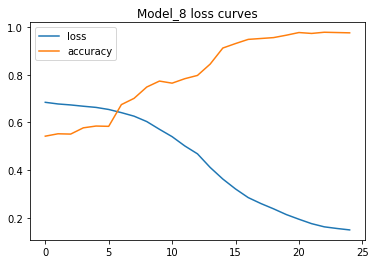

In [60]:
# plot the loss curves
pd.DataFrame(history.history).plot()
# or plt.plot(pd.DataFrame(history.history))
plt.title("Model_8 loss curves")

** 🔑 NOTE: ** For many problems the loss function going down, meaning the model is improving (i.e. the predictions it's making are getting ground truth labels)

## Finding the best learning rate

To find the ideal learning rate (the lr where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** -as an extra piece of a functionality, you can add to your *while* it's training
* Another model (we could use the same one as the above one, but we want to practice building models)
* A modified loss curves plot


In [64]:
# set randomseed
tf.random.set_seed(42)

#1. create a model
model_9=tf.keras.Sequential([
       tf.keras.layers.Dense(4, activation="relu"),
       tf.keras.layers.Dense(4, activation="relu"),
       tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#4. Fit the model (passing as argument the lr callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss:

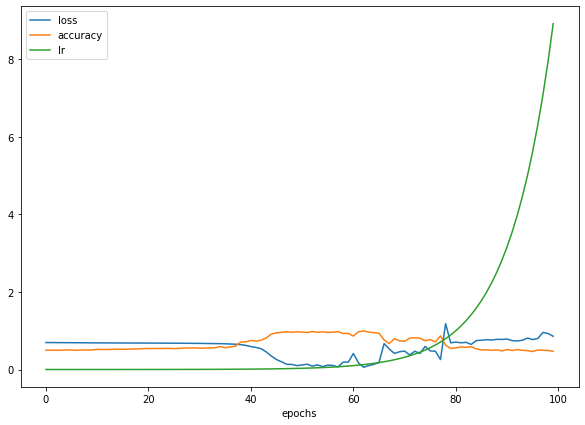

In [65]:
# checkout the history

pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs loss')

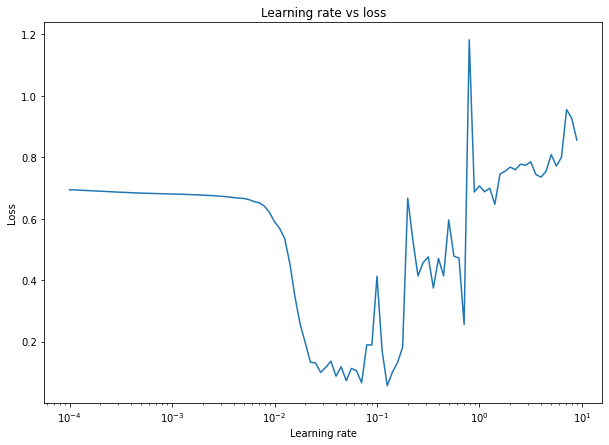

In [71]:
# Plot the lr vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")


In [73]:
# examples of other typical learning rates are:
10**0, 10**-1, 10*8-2, 10**-3, 1e-4

(1, 0.1, 78, 0.001, 0.0001)